## Project 2: Transistors and Amplifiers


This project will introduce two basic techniques for using currents and voltages to control currents and voltages. We will build 2 different circuits and try to collect data. 
For the first circuit, we will essentially try to determine the Gain or $\beta$, which is how big the current has been multiplied. We obtained $\beta = 286$, for this circuit.  
For the second circuit, we will design a circuit that will produce a gain of 2 with the help of an operational amplifier.

#### Circuit Schematic & Function

The first thing we need to do is to set up the following circuit(with transistor) to measure $\beta$ and see how that works.
The 

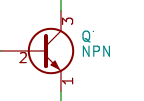

In [280]:
from IPython.display import Image
Image(filename='proj2.png')

The pins are called 1) Emitter, 2) Base, 3) Collector. You can generally think of the Base-Emitter (BE) as a diode (hence the little diode symbol embedded in the picture). The BE diode obeys the Shockley equation over the range of currents and voltages we're going to be using. The magic comes when we look at the behavior of the CE connection. It turns out the current through the CE junction is proportional to the current through the BE junction. The proportionality constant is called the current gain $\beta$.

$$ I_{ce} = \beta I_{be} $$
What's the use? Because $\beta$ can be a large number (think 20 or 50) a small change in $I_{be}$ can produce a large change in $I_{ce}$ which means signals can be amplified.

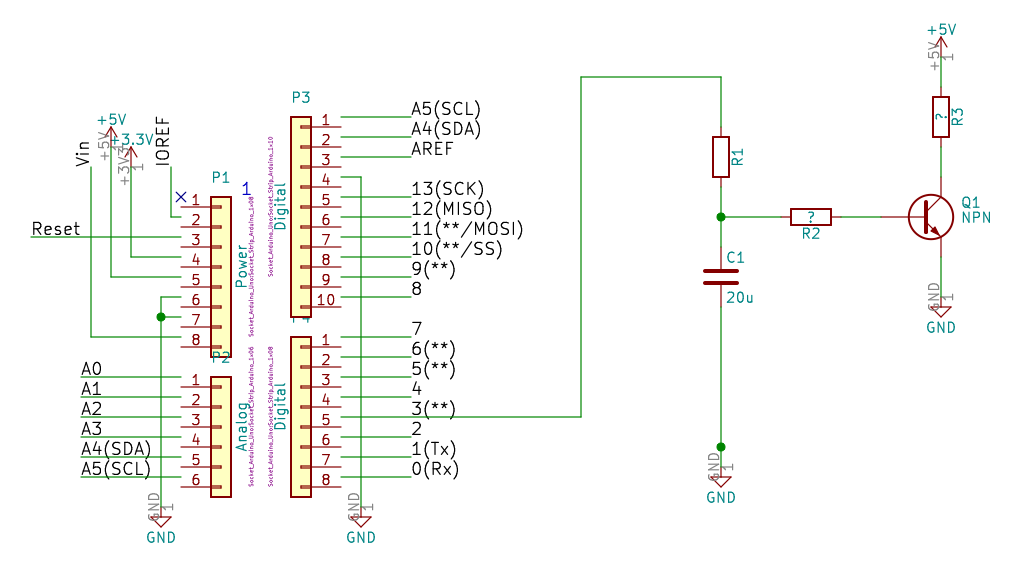

In [281]:
Image(filename='proj2a.png')

In [282]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
from scipy.optimize import curve_fit

In [283]:
df = pd.read_csv('data01.csv')   #Reads the data file

In [284]:
df.head() 

,i,v1,v2,v3
0,0,0,0,1023
1,1,0,0,1023
2,2,2,2,1023
3,3,6,6,1023
4,4,10,10,1023


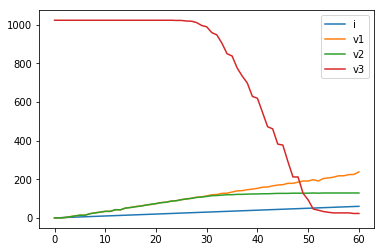

In [285]:
df.plot()    #plots analog i, v1, v2, v3 

We are mostly interested in the region where the voltage significantly changes. In our case, as shown in the graph, we consider the range  [33,50]

In [286]:
vd = df.v1[33:50]*5.0/1023.0
vb = df.v2[33:50]*5.0/1023.0 #Operation to obtain actual voltages 
vc = df.v3[33:50]*5.0/1023.0

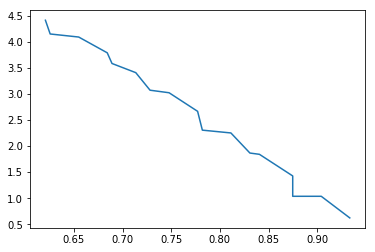

In [287]:
pl.plot(vd,vc)        #plots the graph vd vs vc

In [288]:
ic = (5.0-vc)/5           #solves for the current ic
ic

33    0.116325
34    0.169110
35    0.180841
36    0.241447
37    0.282502
38    0.317693
39    0.385142
40    0.394917
41    0.466276
42    0.538612
43    0.549365
44    0.626588
45    0.631476
46    0.714565
47    0.792766
48    0.792766
49    0.875855
Name: v3, dtype: float64

In [289]:
ib = (vd-vb)/100     #solves for the current ib
ib

33    0.000440
34    0.000391
35    0.000684
36    0.000880
37    0.000929
38    0.001124
39    0.001222
40    0.001417
41    0.001662
42    0.001711
43    0.001955
44    0.002102
45    0.002199
46    0.002542
47    0.002493
48    0.002786
49    0.003079
dtype: float64

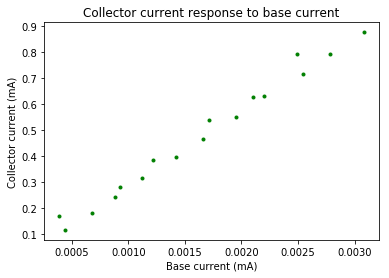

In [290]:
pl.title("Collector current response to base current")
pl.xlabel("Base current (mA)")
pl.ylabel("Collector current (mA)")
pl.plot(ib,ic,'g.')

Let's plot a fitting curve in order to determine $\beta$. To do so, we will use curve_fit. It returns the slope, the y-intercept and a covariance matrix, which gives the uncertainty.

Slope = 286.069 +/- 8.977
Intercept =   0.01038 +/-   0.01628


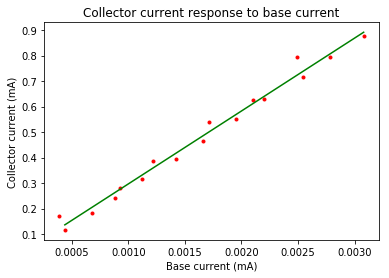

In [291]:
pl.title("Collector current response to base current")
pl.xlabel("Base current (mA)")
pl.ylabel("Collector current (mA)")
pl.plot(ib,ic,'r.')
def fit(x, m, b):
    return m*x+b
par, cov = curve_fit(fit, ib, ic)
m,b = par
dm, db = np.sqrt(np.diag(cov))

ibth = np.linspace(ib.values[0],ib.values[-1],10)
icth = fit(ibth, m, b)
pl.plot(ibth, icth, 'g-')
print("Slope = %5.3f +/- %5.3f" %(m,dm))
print("Intercept = %9.5f +/- %9.5f" %(b,db))

The function curve_fit returns a $\beta$ of 286.


Now, we'll use the following sawtooth or triangle wave as an input to an amplifier with the idea of multiplying the voltage by a factor of 2. How? We'll use the LM324 again, but this time not as a follower but as an amplifier.

Text(0.5, 1.0, 'Steady State signal at Capacitor')

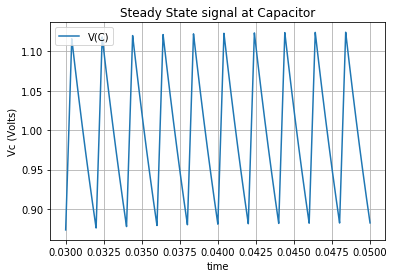

In [292]:
df=pd.read_csv('triangle.csv', sep='\t')
df[df['time']>0.03].plot('time','V(C)')
pl.grid()
pl.legend(loc=2)
pl.ylabel("Vc (Volts)")
pl.title("Steady State signal at Capacitor")

#### CODE


    int flag = 0;        // set when data is collected
    const int N = 150;   // how many data points?

    int v1[N];            // raw analogRead vals
    long times[N];       // times (microseconds)
    int v2[N];            // raw analogRead vals

    void setup()
    {
      pinMode(13, OUTPUT);
      pinMode(3,OUTPUT);
      Serial.begin(9600);
      analogWrite(3,50);
    }

    /*
    ** collectData iterates through the arrays and stores
    ** times and raw voltages as quickly as possible
    */

    void collectData() {
      for (int i=0; i<N; i++) {
        v1[i]=analogRead(0);
        v2[i]=analogRead(1);
        times[i]=micros();
      }
    }

    /*
    ** printData iterates through the arrays and prints the
    ** stored values back to the computer.
    */

    void printData() {
      Serial.println(" t, v1, v2");
      for (int i=0; i<N; i++) {
        Serial.print(times[i]);
        Serial.print(",");
        Serial.print(v1[i]);
            Serial.print(",");
            Serial.println(v2[i]);

      }
    }

    void loop()
    {
      if (flag==0) {
        collectData();
        printData();
        flag=1;
      } else {
        /*
        ** We got the data, just flash the LED now.
        */
        digitalWrite(13, HIGH);
        delay(1000); // Wait for 1000 millisecond(s)
        digitalWrite(13, LOW);
        delay(1000); // Wait for 1000 millisecond(s)
      }
    }

In [293]:
df2 = pd.read_csv('data2.csv')   #Reads the data file


In [294]:
df2.head()

,t,v1,v2
0,336,498,228
1,560,491,225
2,784,484,223
3,1008,478,221
4,1232,472,219


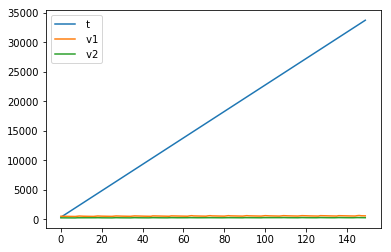

In [295]:
df2.plot()

#### Results

For the first part: the gain was considerably high. We obtained a Ice(collected current) which was 286 greater than the base current. The curve_fit function gave a great estimation of beta. As an example:
* Ibe = 0.003079 A
* Ice = 0.875855 A 

$\beta = Ice/Ibe = 284.46$

- For part 2:

As we can see in the graph above, v1 is slightly above v2. That just means that v2 has been doubled. Just as shown in the table above, v1 is almost the double of v2.
Let's validate our theory by doing v1/v2:

In [296]:
import pandas
colnames = ['time','v1','v2']
df2 = pandas.read_csv('data2.csv', names = colnames)
t = df2.time.tolist()
v1 = df2.v1.tolist()
v2 = df2.v2.tolist()
print(v1[1]+'1')

4981


In [297]:
i=1
while (i<150):
    print(i,":",v1[i],"/",v2[i]," = ",float(v1[i])/float(v2[i]))
    i +=1


1 : 498 / 228  =  2.1842105263157894
2 : 491 / 225  =  2.1822222222222223
3 : 484 / 223  =  2.1704035874439462
4 : 478 / 221  =  2.16289592760181
5 : 472 / 219  =  2.1552511415525113
6 : 466 / 217  =  2.1474654377880182
7 : 460 / 215  =  2.13953488372093
8 : 455 / 213  =  2.136150234741784
9 : 498 / 236  =  2.110169491525424
10 : 534 / 235  =  2.272340425531915
11 : 508 / 231  =  2.1991341991341993
12 : 499 / 228  =  2.18859649122807
13 : 491 / 225  =  2.1822222222222223
14 : 485 / 223  =  2.1748878923766815
15 : 478 / 221  =  2.16289592760181
16 : 472 / 219  =  2.1552511415525113
17 : 466 / 217  =  2.1474654377880182
18 : 504 / 239  =  2.1087866108786613
19 : 541 / 250  =  2.164
20 : 519 / 235  =  2.2085106382978723
21 : 510 / 232  =  2.1982758620689653
22 : 502 / 229  =  2.1921397379912664
23 : 495 / 227  =  2.1806167400881056
24 : 488 / 225  =  2.168888888888889
25 : 482 / 222  =  2.171171171171171
26 : 476 / 220  =  2.1636363636363636
27 : 509 / 240  =  2.120833333333333
28 : 546 /

Just as expected, the data collected at the output is twice the input with a small amount of error.

$Error = (2.2-2.0)/2 = 0.1$


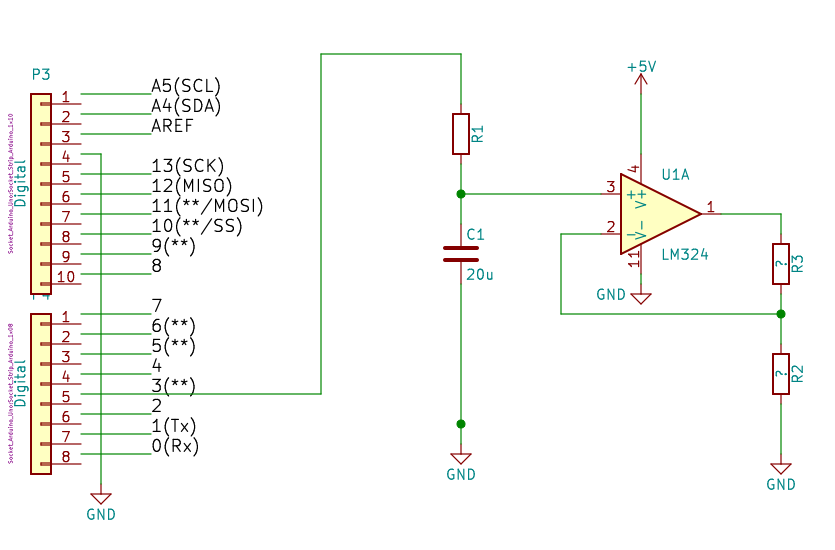

In [298]:
Image(filename='proj2b.png')

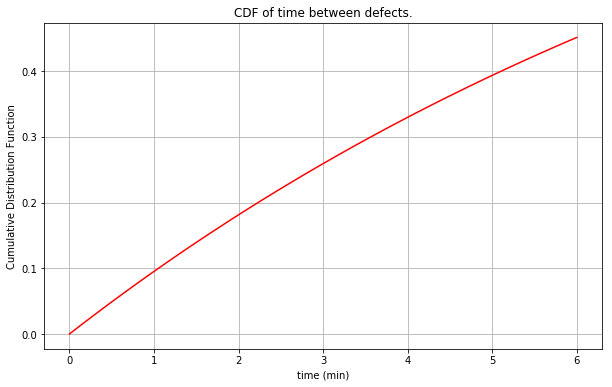

In [299]:

ax=pl.figure(figsize=(10,6))
t=np.linspace(0,6,100)        # make 100 times between 0 and 30 minutes
CDF=1-np.exp(-t/Tau)           # this is the corresponding CDF

pl.plot(t,CDF,'r-')
pl.xlabel('time (min)')
pl.ylabel(r'Cumulative Distribution Function')
pl.title("CDF of time between defects.")
pl.grid()

One clear advantage of a CDF is that you can read probabilities right off the graph. In order to estimate the probability between 4.5 and 5.5 mins, we only need to subtract their probabilities(respectively between 0-4.5 and 0-5.5)  given by the CDF graph.
As we can see: 
* at 5.5, the function equals 0.41 approximatly. 
* at 4.5, the function equals 0.35 approximatly.


 $CDF(5.5) - CDF(4.5) = 0.41-0.35 = 0.0600$

Let's try to find the actual value, by using calculus. 
$CDF(5.5)-CDF(4.5) = (1-e^{-5.5})-(1-e^{-4.5}) = 0.0607$

The percentage error is: $\frac{0.607-0.600 }{0.607} x 100 = 1.15$%

Hence, our estimation is very acceptable with such a result.

Part 2: Solving for the following integral $$\int_{0}^\infty \frac{1}{\tau} e^{\frac{-t}{\tau}} \,t\, dt$$ will demonstrate that $$\langle t \rangle = \int_{-\infty}^\infty P(t)\,t\, dt$$


Let's solve for the integral firl and ignore the upper and lower bounds.
This becomes: 
$$\frac{1}{\tau}\int_{}^\ te^{\frac{-t}{\tau}} \,\,dt$$ 
 
 Integration by part: $uv-\int udv/dt$
 
 * Let $v = t$   
  * $dv/dt = 1$ 
  
*  $u = -\tau e^{\frac{-t}{\tau}}$ 
  * $du/dt = e^{\frac{-t}{\tau}}$

We obtain:
*  $-t\tau e^{\frac{-t}{\tau}}-\int  e^{\frac{-t}{\tau}} $

      * $ f(x) = \tau e^{\frac{-t}{\tau}}-t\tau e^{\frac{-t}{\tau}} $ 
      
      

* When you evaluate f(x) when it tends to both zero and infinity and substract them, you obtain: 

$\lim_{\infty}f(x) - \lim_{0}f(x) = \tau $


### Conclusion

For this experiment:

*  For the first circuit we built, we tried with different techniques to evaluate $\beta$ and obtained a gain of 286, with an uncertainty of +/- 8.977 given by the covariance Matrix after using Fit_curve.

* The second circuit we had to build had a fixed amount of gain. We wanted a gain of exactly 2. However, the output voltages obtained after running the Arduino code were slightly above. We had a gain of 2.2(an error of less than 10 percent). In the calculations, we wanted 2 resitsors of 820 ohms and 1.64 kohms.
Knowing that it is really hard to obtain the same exact values, we ended up using resistors of 800 ohm and 1.6 kohm.

* For the Stats exercises:
 
 The first problem was solved by just looking at the CDF graph and we had to estimate different values. The answer obtained was very acceptable compared to the analytical solution: 0.0600 against 0.0607 for the actual solution.(1.15% error)
 The last problem was more straight forward. We just had to prove, using calculus, that 

$$\frac{1}{\tau}\int_{}^\ te^{\frac{-t}{\tau}} \,\,dt$$ 
